# Quick start (Square Bin)
 
For example, we  use the spatial expression matrix of Bin1 of Stereo-Seq in the mouse brain for the use of **stereopy** tools for downstream analysis.

To download the notebook of Quick start, click the **[link](https://github.com/BGIResearch/stereopy/blob/main/docs/source/Tutorials/quick_start.ipynb)**.

There are two types of Stereo-seq data, gem and gef. The format of the original expression matrix of gem file is as follows: x, y are the spatial position of the gene in the tissue section, and count is the number of gene expression.

|  GeneID   | x | y | count |
|  ----  | ----  | ----| ----|
| Gene1  | 121 | 200 | 2 |
| Gene2  | 234 | 300 | 1 |
| ...  | ... | ... | ... |
| Gene n | 234 | 300 | 1 |

The detail information of gef file is in the [documentation](https://www.processon.com/view/link/610cc49c7d9c087bbd1ab7ab#map).Here, we recommend using the format of gef, the reading speed is much faster than gem.

## Read the raw data of Stereo-Seq

The resolution of Stereo-Seq sequencing technology is up to nanometer level. The nanopore radius of Bin1 is 250 nm. 

Generally, the **bin_size** parameter is set to combine the nanopores within a certain range into a bin unit for analysis. The side length of the bin unit is approximately 14 microns when **bin_size** is set to 20.

After merging according to a certain **bin_size**, we will uniformly generate the data into the format of StereoExpData, which is designed for the analysis.

In addition, stereopy can support reading 10x data, as detailed in the API documentation.

In [ ]:
import warnings

warnings.filterwarnings('ignore')
import stereo as st

Download [our data](https://pan.genomics.cn/ucdisk/s/BvIrye)

In [2]:
# read the gef file information

mouse_data_path = '../../data/SS200000135TL_D1/exon/SS200000135TL_D1.tissue.gef'
st.io.read_gef_info(mouse_data_path)

[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][619][INFO]: This is GEF file which contains traditional bin infomation.
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][620][INFO]: bin_type: bins
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][623][INFO]: Bin size list: ['bin1']
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][629][INFO]: Resolution: 500
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][632][INFO]: Gene count: 20816
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][641][INFO]: offsetX: 0
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][644][INFO]: offsetY: 2
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][647][INFO]: Width: 13441
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][650][INFO]: Height: 19774
[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][653][INFO]: Max Exp: 14


{'bin_list': ['bin1'],
 'resolution': 500,
 'gene_count': 20816,
 'offsetX': 0,
 'offsetY': 2,
 'width': 13441,
 'height': 19774,
 'maxExp': 14}

In [3]:
# read the gef file

data = st.io.read_gef(file_path=mouse_data_path, bin_size=50)

[2022-09-28 12:05:25][Stereo][112054][139741683013440][reader][516][INFO]: read_gef begin ...
[2022-09-28 12:06:26][Stereo][112054][139741683013440][reader][592][INFO]: the matrix has 35890 cells, and 20816 genes.
[2022-09-28 12:06:29][Stereo][112054][139741683013440][reader][600][INFO]: read_gef end.


## Preprocessing

Data preprocessing includes three modules: **Quality control**, **Filtering** and **Normalization**.

### Quality control

The quality control module mainly calculates the data quality distribution of the original data, and mainly counts three indicators:
- the number of genes expressed in the count matrix. (n_genes_by_counts)
- the total counts per cell. (total_counts)
- the percentage of counts in mitochondrial genes. (pct_counts_mt)

In [4]:
data.tl.cal_qc()

[2022-09-28 12:06:30][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run cal_qc...
[2022-09-28 12:06:30][Stereo][112054][139741683013440][st_pipeline][42][INFO]: cal_qc end, consume time 0.3715s.


Show the violin figure of the qc distribution.

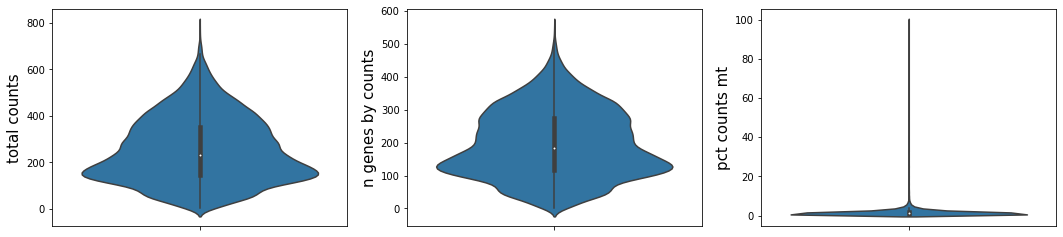

In [5]:
data.plt.violin()

Show the spatial scatter figure of the qc distribution.

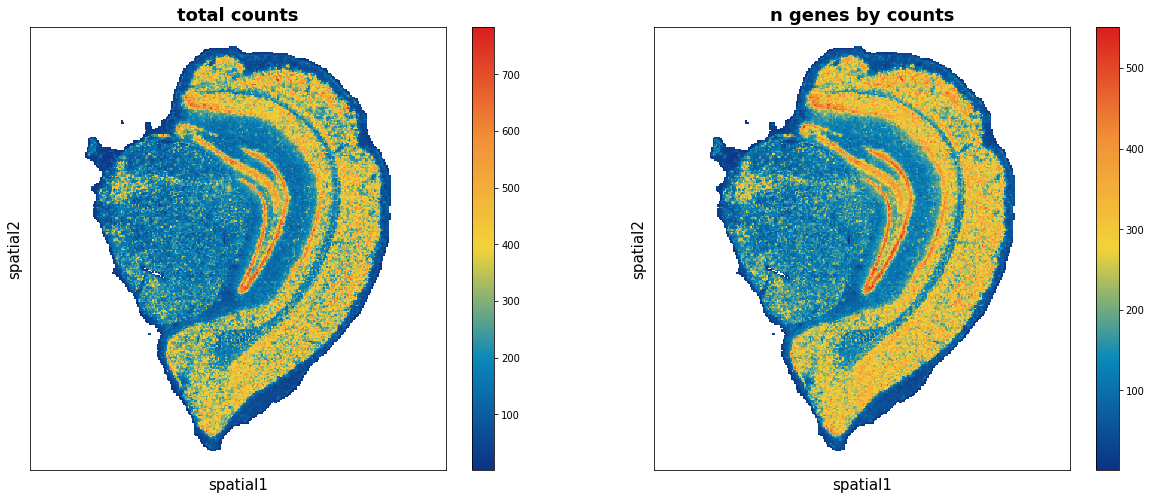

In [6]:
data.plt.spatial_scatter()

### Filtering

Generally, we will filter the `bin unit` based on the three quality control indicators total_count, n_genes_by_counts and pct_counts_MT.

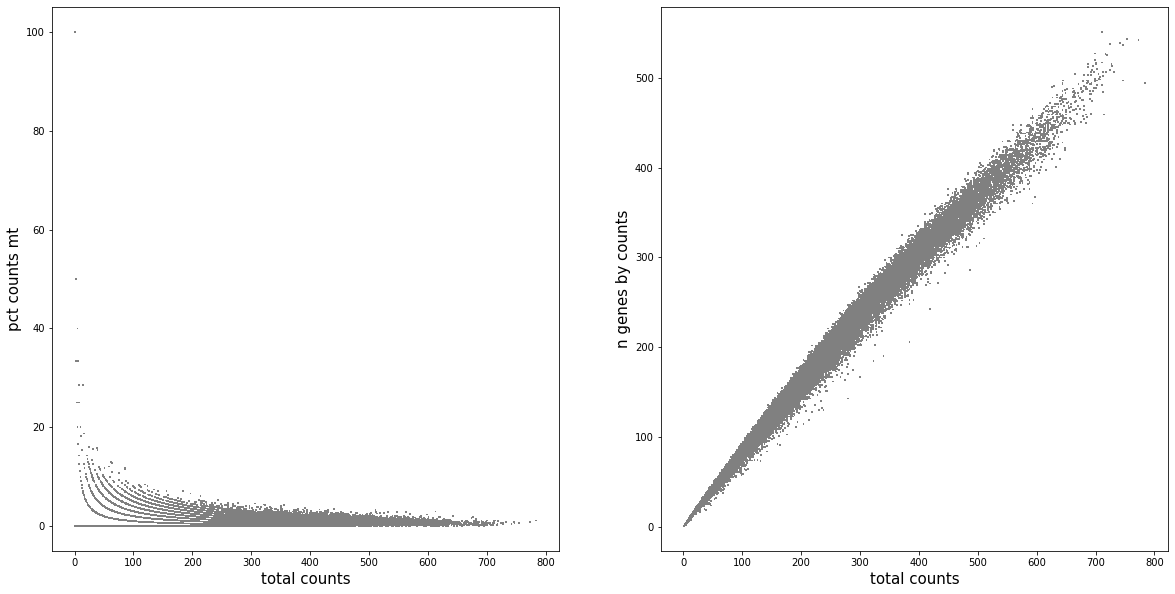

In [7]:
data.plt.genes_count()

In [8]:
data.tl.filter_cells(min_gene=20, min_n_genes_by_counts=3, pct_counts_mt=5, inplace=True)

[2022-09-28 12:07:00][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run filter_cells...
[2022-09-28 12:07:02][Stereo][112054][139741683013440][st_pipeline][42][INFO]: filter_cells end, consume time 1.4349s.


In addition, we also provide `data.tl.filter_genes` function to filter genes and `data.tl.filter_coordinates` function to filer bin unit by its coordinate.

For detailed instructions, please refer to its api document.

### Normalization

In this module, we mainly provide four common standardization methods.

- normalize_total
- log1p
- scale
- quantile
- zscore_disksmooth
- scTransform

If the parameter `inplace` is set to True, data.exp_matrix will be replaced with the normalized result, otherwise unchanged. You can save the raw exp_matrix by `data.tl.raw_checkpoint()`.

In [9]:
data.tl.raw_checkpoint()

In [10]:
data.tl.raw

Run the scTransform normalization method.You can set the `res_key` for save the result. the express matrix will be replaceed by the sctranform result if `inplace` is True.

If use the data.tl.sctransform method, this method include the function of finding highly variable genes, so you don’t need to run the data.tl.highly_variable_genes method. In data.tl.pca method, the parameter ``use_highly_genes`` must be set to False, whether to use highly variable genes to run pca, depend on the parameter ``filter_hvgs`` of the data.tl.sctransform method, set to True to use or False to unuse.

In [11]:
#data.tl.sctransform(res_key='sctransform', n_genes=2000, inplace=True)
data.tl.normalize_total(target_sum=10000)
data.tl.log1p()

[2022-09-28 12:07:02][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run normalize_total...
[2022-09-28 12:07:03][Stereo][112054][139741683013440][st_pipeline][42][INFO]: normalize_total end, consume time 0.5904s.
[2022-09-28 12:07:03][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run log1p...
[2022-09-28 12:07:03][Stereo][112054][139741683013440][st_pipeline][42][INFO]: log1p end, consume time 0.4026s.


 In addition, we also provide `data.tl.normalize_total`, `data.tl.quantile`, `data.tl.zscore_disksmooth` function for normalization.

## Highly variable genes

In [12]:
data.tl.highly_variable_genes(min_mean=0.0125, max_mean=3,min_disp=0.5,
                              n_top_genes=2000, res_key='highly_variable_genes')

[2022-09-28 12:07:03][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run highly_variable_genes...
[2022-09-28 12:07:16][Stereo][112054][139741683013440][st_pipeline][42][INFO]: highly_variable_genes end, consume time 12.5457s.


If `data.to.scale(zero_center=False)` is used, sparse matrix will be used for calculation, which can greatly reduce the memory required for running

In [13]:
data.tl.scale(max_value=10, zero_center=True)

[2022-09-28 12:07:16][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run scale...
[2022-09-28 12:08:39][Stereo][112054][139741683013440][scale][52][INFO]: Truncate at max_value 10
[2022-09-28 12:08:50][Stereo][112054][139741683013440][st_pipeline][42][INFO]: scale end, consume time 93.9627s.


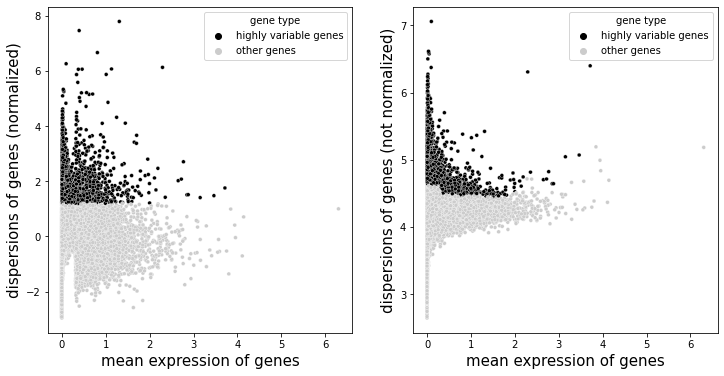

In [14]:
data.plt.highly_variable_genes(res_key='highly_variable_genes')

Scale each gene to unit variance. Clip values exceeding standard deviation 10.

In [15]:
data.tl.scale(max_value=10)

[2022-09-28 12:09:00][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run scale...
[2022-09-28 12:10:14][Stereo][112054][139741683013440][scale][52][INFO]: Truncate at max_value 10
[2022-09-28 12:10:22][Stereo][112054][139741683013440][st_pipeline][42][INFO]: scale end, consume time 82.1045s.



## PCA

By default, PCA is used to reduce dimensionality. If set the parameter use_highly_genes to True, only use highly variable genes to run.

In [16]:
data.tl.pca(use_highly_genes=False, n_pcs=30, res_key='pca')

[2022-09-28 12:10:22][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run pca...
[2022-09-28 12:14:44][Stereo][112054][139741683013440][st_pipeline][42][INFO]: pca end, consume time 262.1578s.


## Neighborhood graph


After PCA, we compute the neighborhood graph of cells using the PCA representation of the expression matrix. 

In addition, we also provide `data.tl.spatial_neighbors` function to compute a spatial neighbors graph.

In [17]:
data.tl.neighbors(pca_res_key='pca', n_pcs=30, res_key='neighbors')

[2022-09-28 12:14:44][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run neighbors...
[2022-09-28 12:20:05][Stereo][112054][139741683013440][st_pipeline][42][INFO]: neighbors end, consume time 320.2154s.


Embedding the graph in two dimensions using UMAP.

In [18]:
data.tl.umap(pca_res_key='pca', neighbors_res_key='neighbors', res_key='umap')

[2022-09-28 12:20:05][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run umap...


	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs


[2022-09-28 12:22:52][Stereo][112054][139741683013440][st_pipeline][42][INFO]: umap end, consume time 166.8934s.


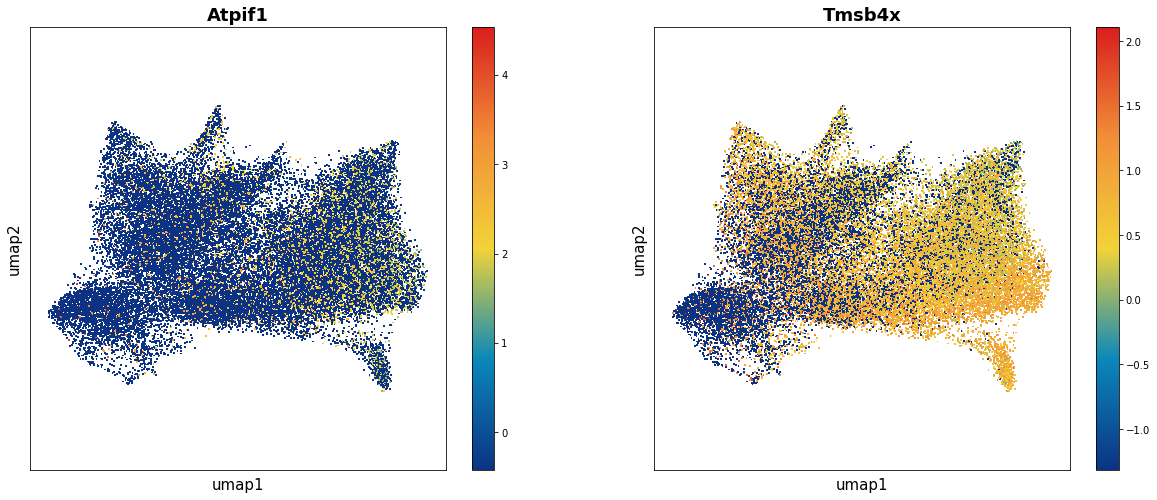

In [19]:
fig = data.plt.umap(gene_names=['Atpif1', 'Tmsb4x'], res_key='umap')

## Clustering

Currently we provide three common clustering methods, including **phenograph**, **leiden** and **louvain**. 

In this tool, you can re-run the normalization method before clustering if the `normalize_method` parameter is not None. Then by default, we use pca to reduce the dimensionality of the new normalization method, and then using the top 30 pcs to run clustering.

### leiden

In [20]:
data.tl.leiden(neighbors_res_key='neighbors', res_key='leiden')

[2022-09-28 12:23:41][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run leiden...
[2022-09-28 12:25:15][Stereo][112054][139741683013440][st_pipeline][42][INFO]: leiden end, consume time 93.9062s.


Show the spatial distribution of the clusering result.

<AxesSubplot:>

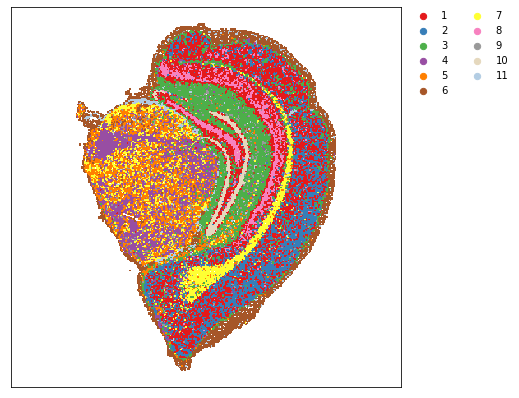

In [21]:
data.plt.cluster_scatter(res_key='leiden')

It can also show the umap spatial distribution of the clustering result.

<AxesSubplot:title={'center':'leiden'}, xlabel='umap1', ylabel='umap2'>

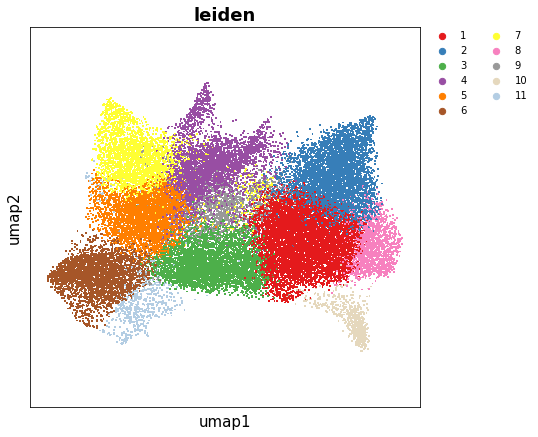

In [22]:
data.plt.umap(res_key='umap', cluster_key='leiden')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
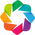

Row
    [0] ParamFunction(function)
    [1] Column
        [0] ColorPicker(name='background color', value='#ffffff', width=200)
        [1] IntSlider(end=200, name='dot size', start=1, value=1, width=200)
        [2] Select(name='color theme', options=['glasbey', 'glasbey_bw', ...], value='stereo_30', width=200)
        [3] Row
            [0] Select(name='cluster', options=['1', '2', '3', ...], value='1', width=100)
            [1] ColorPicker(name='node color', value='#E41A1C', width=70)

In [23]:
data.plt.interact_cluster(res_key='leiden')

This web page was generated from a Jupyter notebook and not all interactivity will work on this website. Right click to download and run locally for full Python-backed interactivity.

### louvain

In [24]:
data.tl.louvain(neighbors_res_key='neighbors', res_key='louvain')

[2022-09-28 12:25:38][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run louvain...
[2022-09-28 12:25:43][Stereo][112054][139741683013440][_louvain][99][INFO]:     using the "louvain" package of Traag (2017)
[2022-09-28 12:26:28][Stereo][112054][139741683013440][st_pipeline][42][INFO]: louvain end, consume time 49.9532s.


<AxesSubplot:>

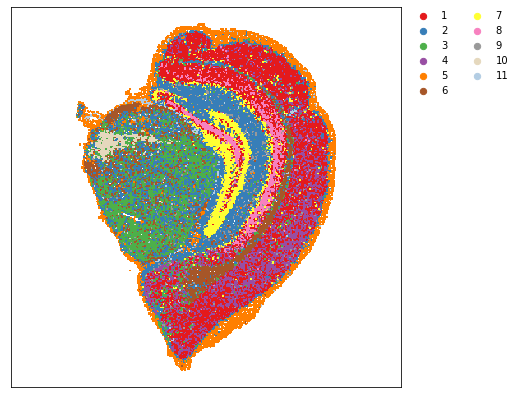

In [25]:
data.plt.cluster_scatter(res_key='louvain')

### phenograph

In [26]:
data.tl.phenograph(phenograph_k=30, pca_res_key='pca', res_key='phenograph')

[2022-09-28 12:26:34][Stereo][112054][139741683013440][st_pipeline][39][INFO]: start to run phenograph...


Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 513.7678525447845 seconds
Jaccard graph constructed in 267.0377037525177 seconds
Running Leiden optimization
Leiden completed in 122.86765384674072 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 1070.596971988678 seconds


[2022-09-28 12:44:25][Stereo][112054][139741683013440][st_pipeline][42][INFO]: phenograph end, consume time 1071.0225s.


<AxesSubplot:>

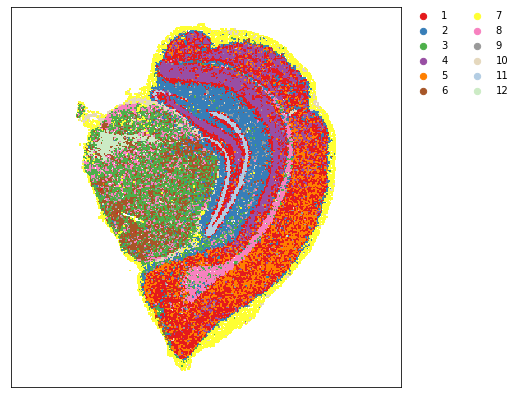

In [27]:
data.plt.cluster_scatter(res_key='phenograph')

## Find marker genes

By default, the raw count of express matrix and highly-variable genes are used to compute the result.

### Hypothesis test
In `st.tools.FindMarker`, it provides a hypothesis test to analyze differences between two groups. It support two methods including `t_test` and `wilcoxon_test`.

In [ ]:
data.tl.find_marker_genes(cluster_res_key='leiden', method='t_test', use_highly_genes=False, use_raw=True)

Then, show the score of top 10 marker genes for the each group.

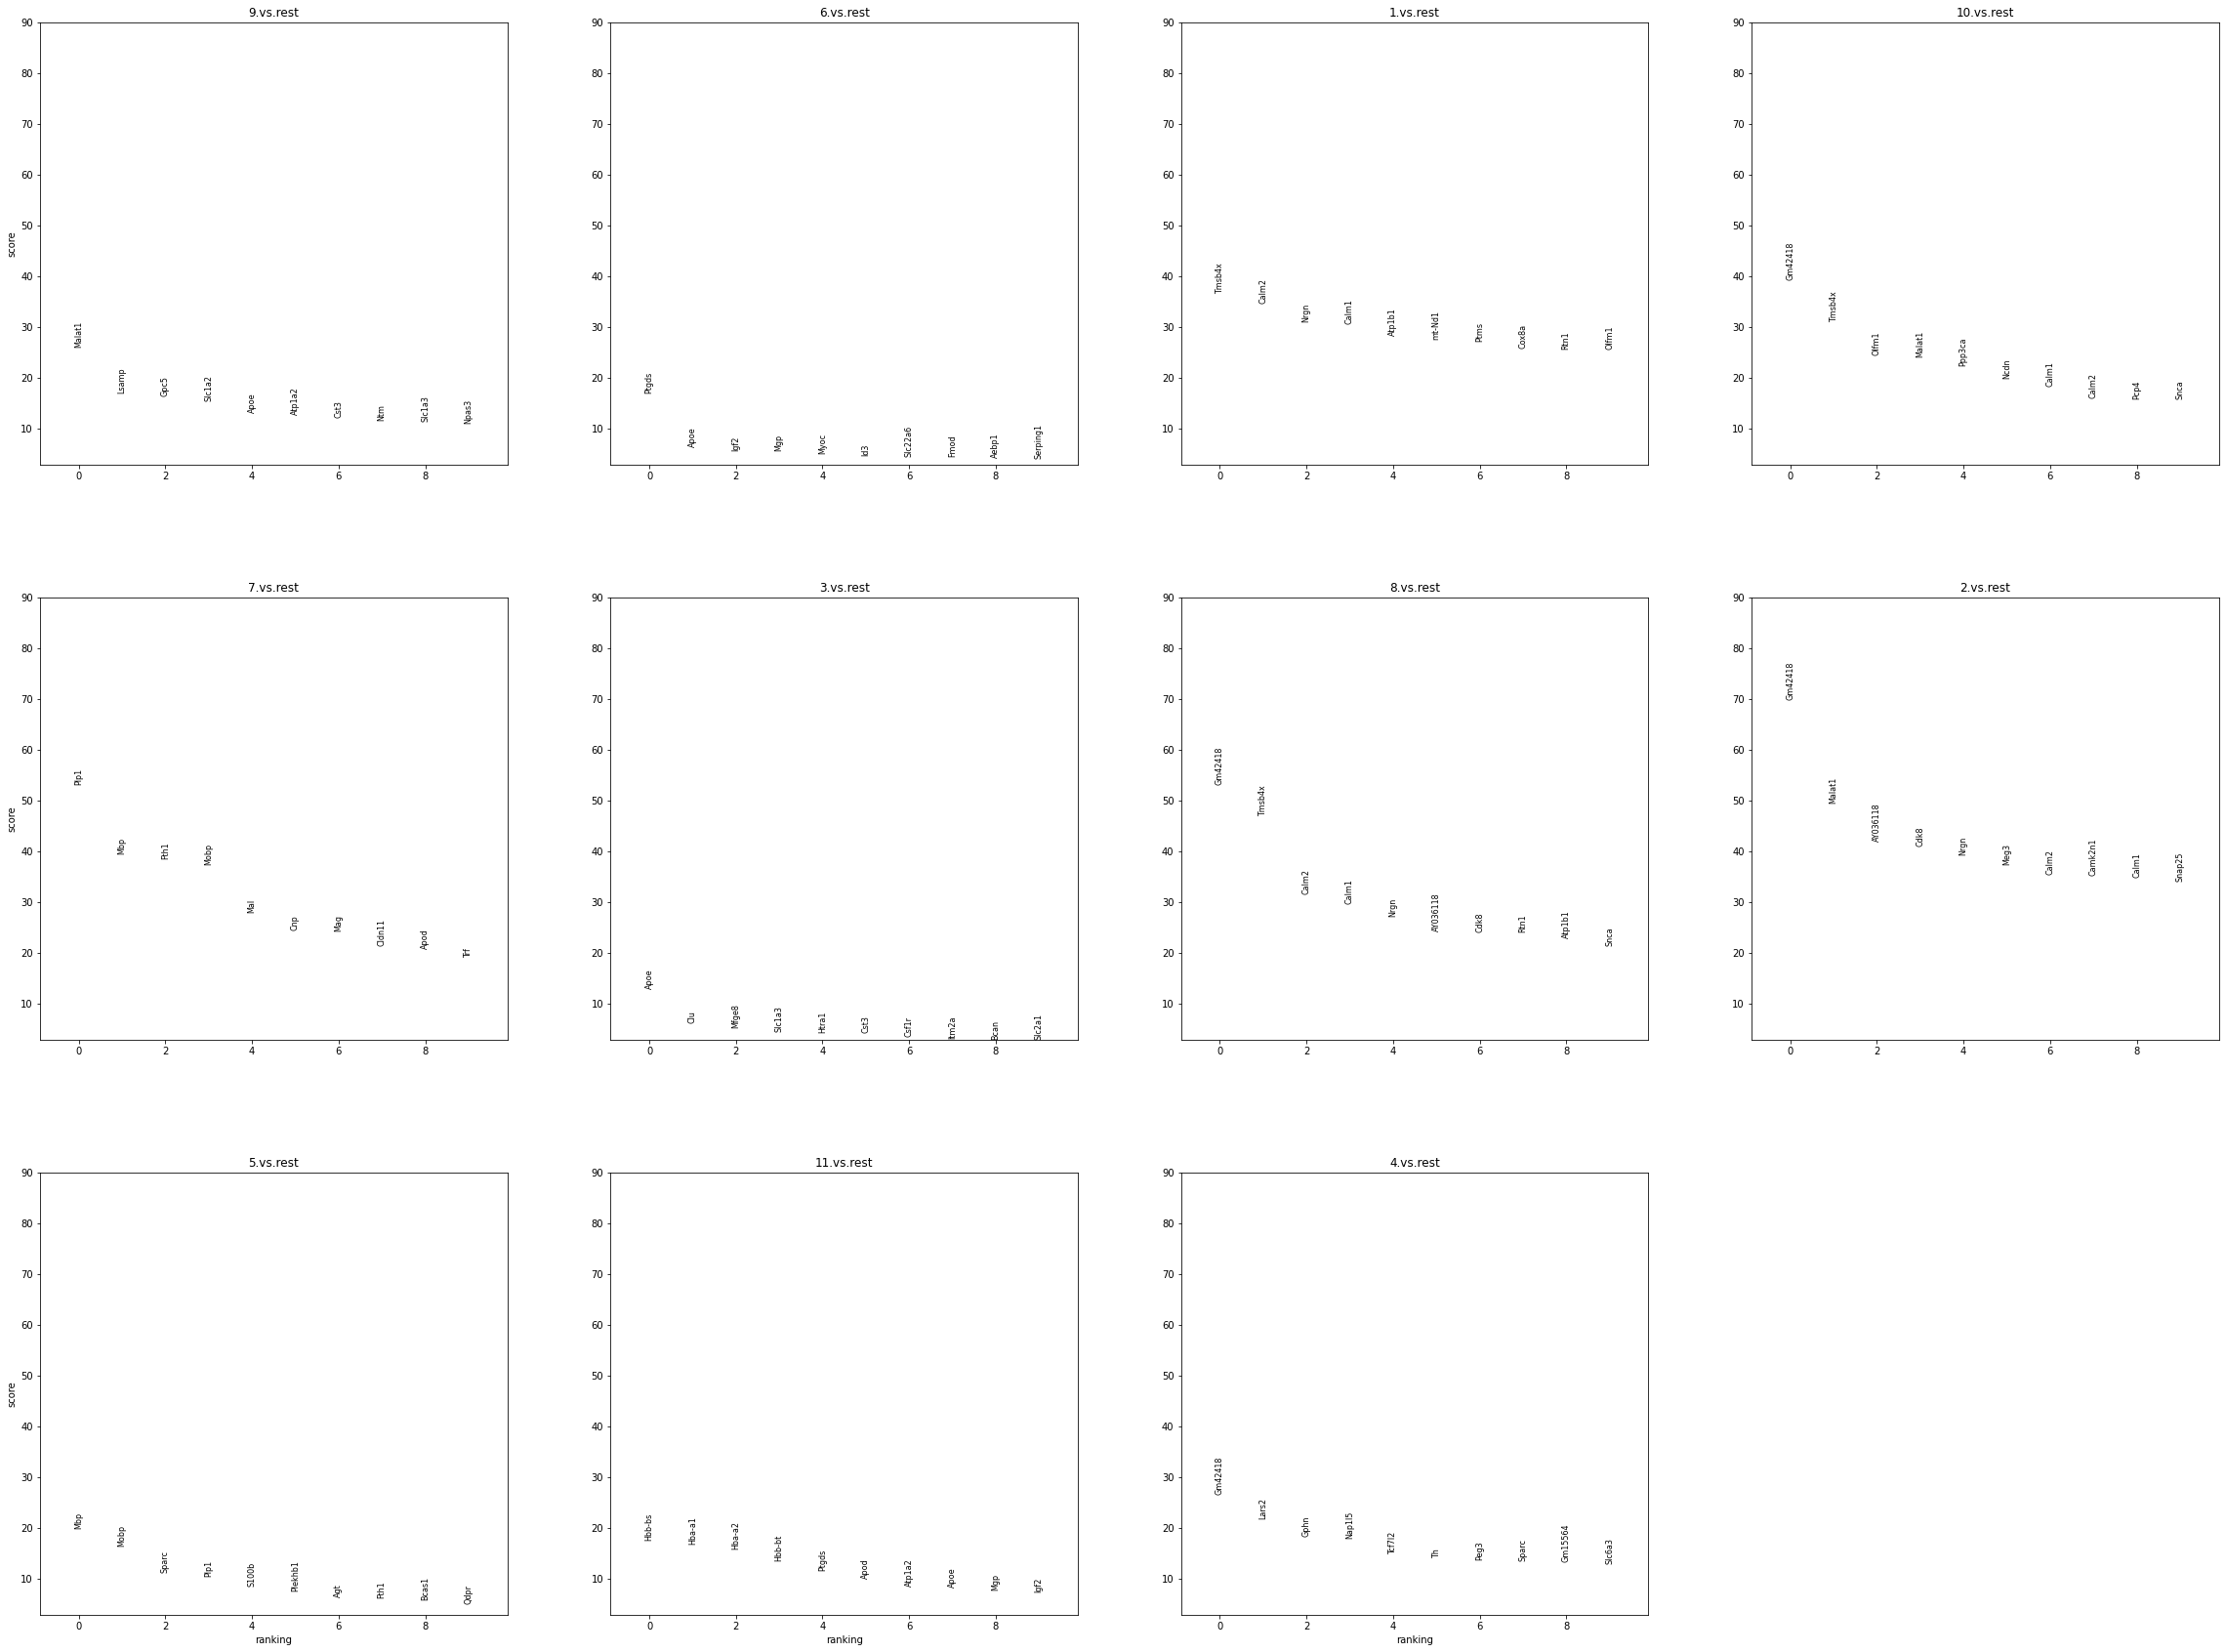

In [29]:
data.plt.marker_genes_text(res_key='marker_genes', markers_num=10, sort_key='scores')

Show the heatmap plot of top 5 marker genes.

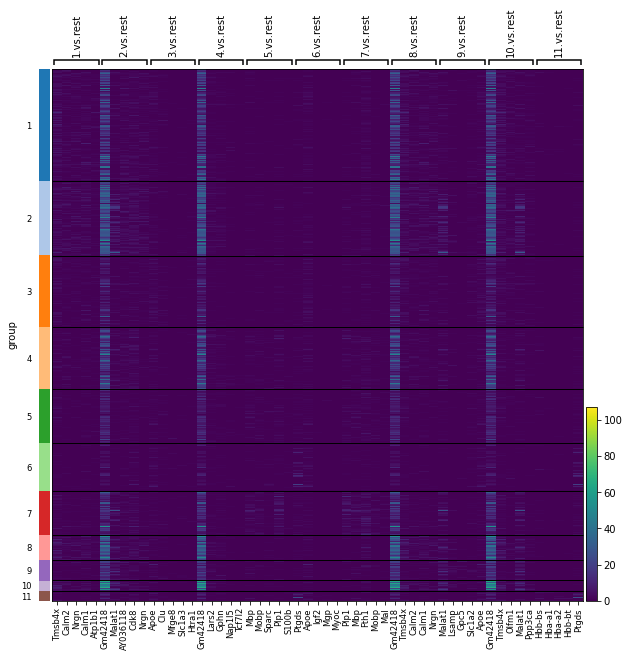

In [30]:
data.plt.marker_genes_heatmap(res_key='marker_genes', cluster_res_key='leiden', do_log=False)

Show the volcano plot.

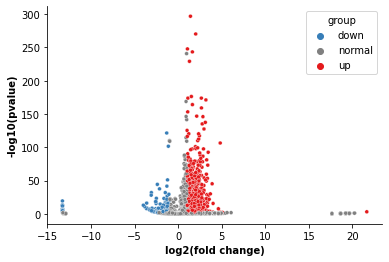

In [32]:
data.plt.marker_gene_volcano(group_name='2.vs.rest', vlines=False)